# Code for Mean Variance Analysis 

#### Specific Tasks 3 Basic Statistics

note:  RET (cumdividend returns during the month)
i used monthly total return (dividends reinvested)

display arithmetic mean, standard deviation, skewness and kurtosis

In [2]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize # For question 5


### Basic Statistical Computation

| Company                            | Ticker  | Arithmetic Mean | Standard Deviation | Skewness  | Kurtosis   |
|------------------------------------|---------|-----------------|--------------------|-----------|------------|
| MICROSOFT CORP                     | MSFT    | 0.011435        | 0.081239           | 0.224322  | 3.247865   |
| HONEYWELL INTERNATIONAL INC        | HON     | 0.009971        | 0.082070           | -0.067523 | 7.593184   |
| COCA COLA CO                       | KO      | 0.006012        | 0.050066           | -0.495389 | 1.186580   |
| INTERNATIONAL BUSINESS MACHS COR   | IBM     | 0.006183        | 0.071326           | 0.406316  | 3.513460   |
| AMGEN INC                          | AMGN    | 0.009169        | 0.072999           | 0.527964  | 1.748620   |
| CHEVRON CORP                       | CVX     | 0.009672        | 0.068414           | 0.421535  | 2.107756   |
| APPLE COMPUTER INC                 | AAPL    | 0.025996        | 0.112149           | -0.587006 | 3.462344   |
| PROCTER & GAMBLE CO                | PG      | 0.007029        | 0.051448           | -1.343322 | 8.146717   |
| CATERPILLAR INC                    | CAT     | 0.015206        | 0.091571           | 0.064484  | 1.780487   |
| WALGREEN CO                        | WBA     | 0.004351        | 0.078679           | 0.505842  | 0.997621   |
| BOEING CO                          | BA      | 0.012633        | 0.095348           | -0.266885 | 3.667575   |
| JOHNSON & JOHNSON                  | JNJ     | 0.007496        | 0.047337           | -0.158169 | 1.165602   |
| MINNESOTA MINING & MFG CO          | MMM     | 0.006922        | 0.060518           | -0.034227 | 0.350853   |
| MERCK & CO INC                     | MRK     | 0.007238        | 0.068200           | -0.220212 | 1.283720   |
| DISNEY WALT CO                     | DIS     | 0.007826        | 0.077729           | 0.062561  | 1.290601   |
| MCDONALDS CORP                     | MCD     | 0.010594        | 0.056201           | -0.363494 | 2.309812   |
| CHASE MANHATTAN CORP NEW           | JPM     | 0.010301        | 0.086118           | -0.196087 | 1.108788   |
| WAL MART STORES INC                | WMT     | 0.005864        | 0.054840           | -0.288386 | 1.104102   |
| NIKE INC                           | NKE     | 0.014145        | 0.078386           | -0.192031 | 4.464711   |
| AMERICAN EXPRESS CO                | AXP     | 0.009606        | 0.091426           | 2.570689  | 26.519404  |
| INTEL CORP                         | INTC    | 0.007558        | 0.097372           | -0.382654 | 2.331643   |
| ST PAUL COS INC                    | TRV     | 0.010476        | 0.070194           | 1.416043  | 11.989484  |
| BELL ATLANTIC CORP                 | VZ      | 0.004487        | 0.063275           | 0.815699  | 5.053094   |
| HOME DEPOT INC                     | HD      | 0.009966        | 0.072457           | -0.175652 | 0.287009   |
| CISCO SYSTEMS INC                  | CSCO    | 0.005659        | 0.094550           | -0.169626 | 2.227304   |
| GOLDMAN SACHS GROUP INC            | GS      | 0.010189        | 0.091809           | 0.143186  | 0.635348   |
| UNITED HEALTHCARE CORP             | UNH     | 0.018471        | 0.069060           | -0.574619 | 2.711388   |


#### Return Statistics for the S&P 500
| Arithmetic Mean | Standard Deviation | Skewness  | Kurtosis   |
|------------------------------------|---------|-----------------|--------------------|
|0.005101     |       0.044616| -0.471522|  0.766747|

#### Skewness Disscussion 

We see that the the market return is negatively skewed. This means that the median of the return is less than the arithemtic mean. This shows that the unfavorable results in some investment have significant impact on the return of the index. During the time peroid of interest, we saw many key events which contributed to the negative skewness. 3 Major sectors of the index experienced major losses:

1. Technology sector (Dot-Com Bubble Bust): Companies like Intel and Cisco lost significant value.
2. Financial sector (Subprime Morgage Crisis): Almost All companies were impacts in the chain reaction following the default of Lehman Brothers
3. Engergy sector: During COVID, energy companies sustain major loss.

Given that S&P500 is a value weighted index, the unfavorable performance in the forementioned sector have driven the skewness to be negative. With that being said, the observed Skewness is only -0.47, indicating that market have otherwise been stable. 

#### VaR Discussion

Value at risk (VaR) measures the downside risks in a portfolio under a given confidence level *x* indicating the probability that the loss will not exceed the VaR over the given time peroid. VaR is computed by sorting the data points, and taking the value at the *x* percentile. Intuitively, that data point at a lower percentile have a lower value, indicating more loss, and *100-x%* of the data points are greater than the data point at *x* percentile, signifing less loss/more gain. 

In the return for S&P 500, the 5% VaR is -8.11%. This mean that there is a 95% chance that we will obtain a month to month return that is greater than -8.11% and a 5% chance that we suffer from a loss that is greater than -8.11%. The variable that I used to compute VaR is *Return on the S&P 500 Index*. This is because this variable have the <font color ="red"> dividends reinvested into the portfilio.</font>


------------
Below is the statistics for S&P500
   Arithmetic mean  Standard Deviation  Skewness  Kurtosis
0         0.005101            0.044616 -0.471522  0.766747


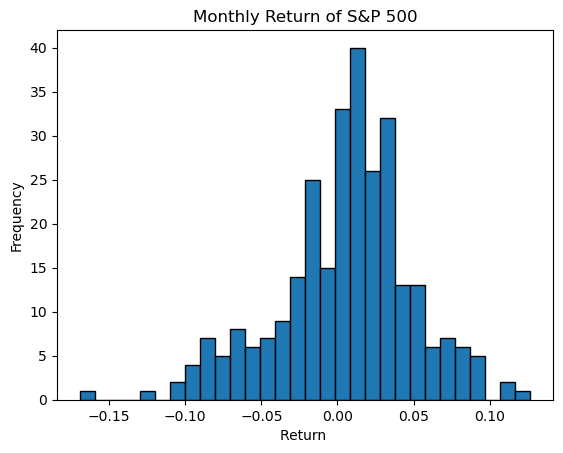

5% Value at Risk (VaR): -0.0811


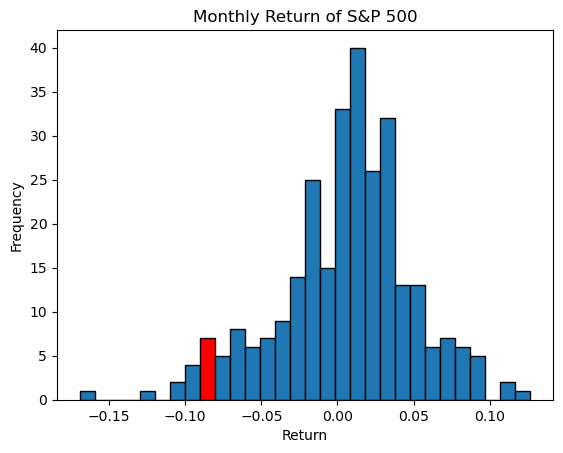

In [13]:
# Read in the sheets
dj27returns = pd.read_excel("returns.xlsx", sheet_name="d27returns")
sp500return = pd.read_excel("returns.xlsx", sheet_name="sp500")
dj27returns['Names Date'] = pd.to_datetime(dj27returns['Names Date'], format='%m/%d/%Y')
dj27returns['Year'] = dj27returns['Names Date'].dt.year
'''
Group elements by the PERMNO, grouping using this ensures that company name change does not create new groups.

For example Apple, had 2 different name: APPLE COMPUTER INC and later APPLE INC.
'''
comp_list =[]
dj27returns_grouped = dj27returns.groupby("PERMNO")
res_dj27 = []
for name, group in dj27returns_grouped:

    # compute the information
    ticker = group["Ticker Symbol"].iloc[0]
    company_name = group["Company Name"].iloc[0]
    # Lambda: we take each month's return, mutiply them together and then subtract 1 
    yearly_return = group.groupby("Year")["Returns"].apply(lambda x: (1 + x).prod() - 1)
    arithmetic_mean = yearly_return.mean()
    standard_div = yearly_return.std()
    
    comp_list.append(company_name)
    kurtosis = group["Returns"].kurtosis()
    skewness =group["Returns"].skew()
    res_dj27.append({
        "Ticker": ticker,
        "Company": company_name,
        "Arithmetic mean": (arithmetic_mean),
        "Standard Deviation": (standard_div),
        "Skewness" :(skewness),
        "Kurtosis": (kurtosis)
    })
dj27_data = pd.DataFrame(res_dj27)
display_dj27_data = np.round(dj27_data,5)
#print(display_dj27_data)

# working on S&P 500 data
res_sp500=[]
arithmetic_mean = sp500return["Return on the S&P 500 Index"].mean()
standard_div = sp500return["Return on the S&P 500 Index"].std()
kurtosis = sp500return["Return on the S&P 500 Index"].kurtosis()
skewness =sp500return["Return on the S&P 500 Index"].skew()

res_sp500.append({
        "Arithmetic mean": arithmetic_mean,
        "Standard Deviation": standard_div,
        "Skewness": skewness,
        "Kurtosis": kurtosis
})

sp500_data = pd.DataFrame(res_sp500)
print("------------")
print("Below is the statistics for S&P500")
print(sp500_data)

plt.hist(sp500return["Return on the S&P 500 Index"], bins=30, edgecolor='black')
plt.title("Monthly Return of S&P 500")
plt.xlabel("Return ")
plt.ylabel("Frequency")
plt.show()


bins = 30
n, bin_edges, patches = plt.hist(sp500return["Return on the S&P 500 Index"], bins=bins, edgecolor='black')
highlight_value = -0.0811  
# Find the bin that contains the highlight_value
for i in range(len(bin_edges) - 1):
    if bin_edges[i] <= highlight_value < bin_edges[i + 1]:
        patches[i].set_facecolor('red')  # Change bin color to red
        break

# Add labels and title
plt.title("Monthly Return of S&P 500")
plt.xlabel("Return")
plt.ylabel("Frequency")

# VaR computation
var_5 = np.percentile(sp500return["Return on the S&P 500 Index"], 5) 
print(f"5% Value at Risk (VaR): {var_5:.4f}")


#### 4 Indexing.

Assumming that our index starts at 1000 points, each stock will receive $\frac{1000}{27}$ points. 


Text(87, 15392.557871232406, 'Max Value Occured on 12/2023')

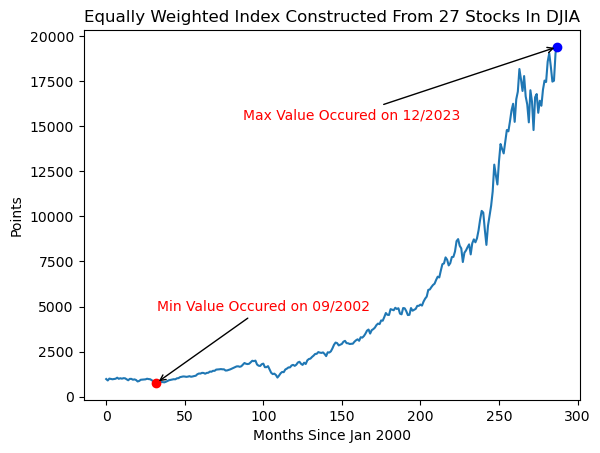

In [4]:
#wrong 

total_points = np.zeros(288)
# print(total_points)
initial_point = 1000/27
for name, group in dj27returns_grouped:
    # compute the return
    total_points += initial_point * np.cumprod([1 + r for r in group["Returns"]])

# print(total_points)
min = total_points.min()
min_idx = total_points.argmin()

max = total_points.max()
max_idx = total_points.argmax()
plt.plot(total_points)
plt.title("Equally Weighted Index Constructed From 27 Stocks In DJIA")
plt.xlabel("Months Since Jan 2000")
plt.ylabel("Points")
plt.plot(min_idx, min, 'ro', label="Single Dot")
plt.plot(max_idx, max, 'bo', label="Single Dot")
plt.annotate("Min Value Occured on 09/2002", 
             xy=(min_idx,min),       # Point to annotate
             xytext=(min_idx + 0.5, min + 4000),  # Position of text
             arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
             fontsize=10, color='red')

plt.annotate("Max Value Occured on 12/2023", 
             xy=(max_idx,max),       # Point to annotate
             xytext=(max_idx - 200, max - 4000),  # Position of text
             arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
             fontsize=10, color='red')


Text(87, 8864.170862189627, 'Max Value Occured on 12/2023')

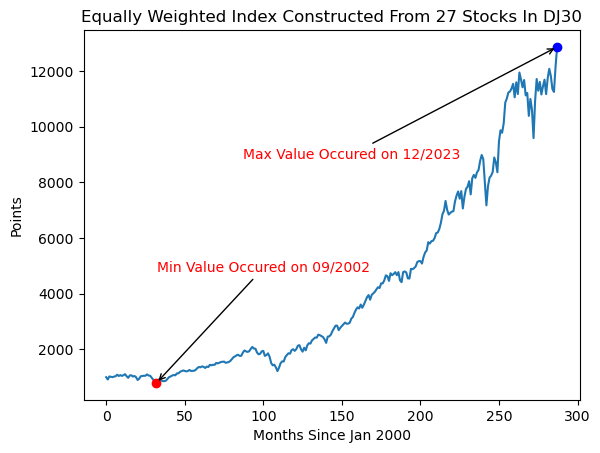

In [5]:
total_points = np.zeros(288)  # Assuming 288 time periods
initial_point = 1000  # Starting index value
N = 27  # Number of securities (adjust if this varies)

# Assuming `dj27returns_grouped` is a grouped object with 'Returns' column for each security
equal_weighted_index = initial_point

# Iterate through each time period to calculate the index
for t in range(len(total_points)):
    # Calculate the summation of price relatives (1 + Returns) for all securities
    price_relatives = [
        (1 + group["Returns"].iloc[t]) for name, group in dj27returns_grouped if t < len(group["Returns"])
    ]

    average_price_relative = np.mean(price_relatives)
    
    if t == 0:
        total_points[t] = initial_point
    else:
        total_points[t] = (average_price_relative * total_points[t - 1])
    
min = total_points.min()
min_idx = total_points.argmin()

max = total_points.max()
max_idx = total_points.argmax()
plt.plot(total_points)
plt.title("Equally Weighted Index Constructed From 27 Stocks In DJ30")
plt.xlabel("Months Since Jan 2000")
plt.ylabel("Points")
plt.plot(min_idx, min, 'ro', label="Single Dot")
plt.plot(max_idx, max, 'bo', label="Single Dot")
plt.annotate("Min Value Occured on 09/2002", 
             xy=(min_idx,min),       # Point to annotate
             xytext=(min_idx + 0.5, min + 4000),  # Position of text
             arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
             fontsize=10, color='red')

plt.annotate("Max Value Occured on 12/2023", 
             xy=(max_idx,max),       # Point to annotate
             xytext=(max_idx - 200, max - 4000),  # Position of text
             arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
             fontsize=10, color='red')

### Minimum variance optimzation


steps
1. bulid the covariance matrix, create the arithmetic returns
2. use the Provided code
3. Find the optimal weighting 


In [6]:
row_ptr = 0
cov_mat = np.zeros((27,27)) # 27 x 27 matrix containing the covariance of all the stocks from Dow Jones
mean_returns = []
display_mean_return = []
for name, group1 in dj27returns_grouped:
    col_ptr = 0
    for name2, group2 in dj27returns_grouped:
        if col_ptr == row_ptr: # we are working on
            cov_mat[row_ptr][col_ptr] = group1["Returns"].var() 
        else:
            group1 = group1.reset_index(drop=True)  # Reset index so they are comparable
            group2 = group2.reset_index(drop=True)
            cov_mat[row_ptr][col_ptr] = group1["Returns"].cov(group2["Returns"])
        col_ptr+=1

    row_ptr+=1
    mean_returns.append(group1["Returns"].mean())
    display_mean_return.append(round(group1["Returns"].mean(),4))

display_cov_mat = np.round(cov_mat.copy(),4)
print(display_cov_mat)


[[ 0.0066  0.0021  0.0009  0.0027  0.0011  0.0015  0.0045  0.      0.0021
   0.0009  0.0016  0.0007  0.0011  0.0009  0.002   0.0012  0.0028  0.0011
   0.0015  0.0023  0.0039  0.0013  0.0021  0.0021  0.0035  0.0032  0.0007]
 [ 0.0021  0.0067  0.0014  0.0024  0.0013  0.0025  0.002   0.0012  0.0044
   0.0026  0.004   0.001   0.0027  0.0019  0.0033  0.0022  0.0034  0.001
   0.0021  0.0037  0.0032  0.0024  0.0019  0.0022  0.0032  0.003   0.0018]
 [ 0.0009  0.0014  0.0025  0.0007  0.0005  0.0012  0.0004  0.0012  0.0012
   0.001   0.0017  0.0011  0.0011  0.0012  0.0012  0.0014  0.0011  0.0007
   0.0013  0.0014  0.0006  0.0013  0.001   0.0009  0.0009  0.001   0.0006]
 [ 0.0027  0.0024  0.0007  0.0051  0.0017  0.0017  0.0034  0.0002  0.0024
   0.0012  0.0017  0.0009  0.0016  0.0007  0.0021  0.0011  0.003   0.0008
   0.0014  0.0024  0.0037  0.0016  0.0015  0.0021  0.0035  0.0032  0.0009]
 [ 0.0011  0.0013  0.0005  0.0017  0.0053  0.0009  0.0014  0.001   0.0015
   0.0013  0.0013  0.0013  0.0012  

In [7]:
def minimum_variance_portfolio(returns, expected_return=None):
    num_assets = len(returns)
    init_guess = np.ones(num_assets) / num_assets
    # get portfolio volaitity by multiplying weights to covariance matrix
    def portfolio_volatility(weights, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))

    # get portfolio returns by multiplying weights to mean_returns
    def portfolio_return(weights, mean_returns):
        return np.dot(weights.T, mean_returns)

    if expected_return is None:
        # being compared to 0 to ensure port weight adds up to one
        constraints = [{"type": "eq", "fun": lambda x: np.sum(x) - 1}] 
    
    else:
        constraints = [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
                       {"type": "eq", "fun": lambda x: portfolio_return(x, mean_returns) - expected_return}]

    bounds = [(-1, 1) for i in range(num_assets)]
    # will not short more than 100% of the stock

    # encoding the linear program depicted in Slide 22
            # literally a black box 
    result = minimize(fun=portfolio_volatility,
                        x0=init_guess,
                        args=(cov_mat,),
                        method="SLSQP", # sequencial least squared
                        constraints=constraints,
                        bounds=bounds)

    # set variables to output
    w_min_var = result.x
    ret_min_var = np.sum(mean_returns * w_min_var)
    std_min_var = result.fun
    return w_min_var, ret_min_var, std_min_var

# define weights, standard dev and returns for mininimum variance portfolio
w_gmv, ret_gmv, std_gmv = minimum_variance_portfolio(mean_returns)
print(np.round(w_gmv,5))
print("standard deviation of monthly return",round(np.sqrt(std_gmv),5))
print("Expected monthly return",round(ret_gmv,5))

[ 0.04008 -0.04949  0.10651  0.04802  0.07224  0.049    0.03897  0.14952
 -0.05491  0.03357 -0.02344  0.10247  0.04429  0.06112  0.00716  0.06508
 -0.01064  0.12886  0.01943 -0.04743  0.00718  0.03235  0.07161  0.03357
  0.00533 -0.013    0.08258]
standard deviation of monthly return 0.03312
Expected monthly return 0.00832


### Finding the Minimum Variance Portfolio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.00145, 0.0091, 0.01676, 0.02441, 0.03207, 0.03972, 0.04737, 0.05503, 0.06268, 0.07033, 0.07799]


Text(0, 0.5, 'Return (%)')

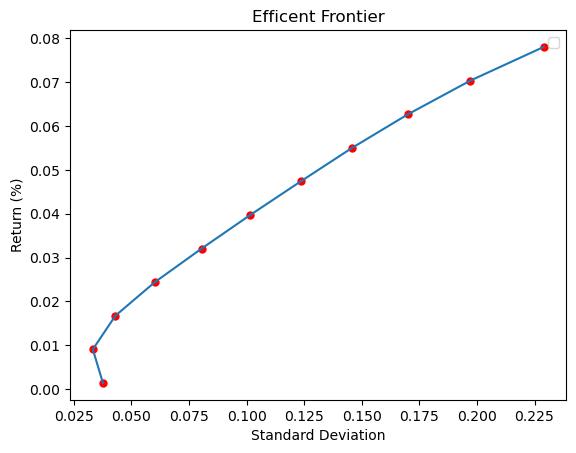

In [8]:
sorted_return = mean_returns.copy()
sorted_return.sort()

r_low = sorted_return[0]
r_high = sorted_return[26]


delta_r = (3*r_high - r_low/3)/10 
p_std =[]
p_ret =[]
expected_returns = np.linspace(r_low / 3, 3 * r_high, 11)
portfolios = []
for r in expected_returns:
    w, ret, std = minimum_variance_portfolio(mean_returns, r)
    p_std.append(np.round(np.sqrt(std),5))
    p_ret.append(np.round(ret,5))
    portfolios.append((w, ret, std))
    
print(p_ret)
for i in range (0,11):
    plt.plot(p_std[i], p_ret[i], 'ro',ms=5)

plt.plot(p_std,p_ret)
plt.legend()
plt.title("Efficent Frontier")
plt.xlabel("Standard Deviation")
plt.ylabel("Return (%)")


Text(0, 0.5, 'Return (%)')

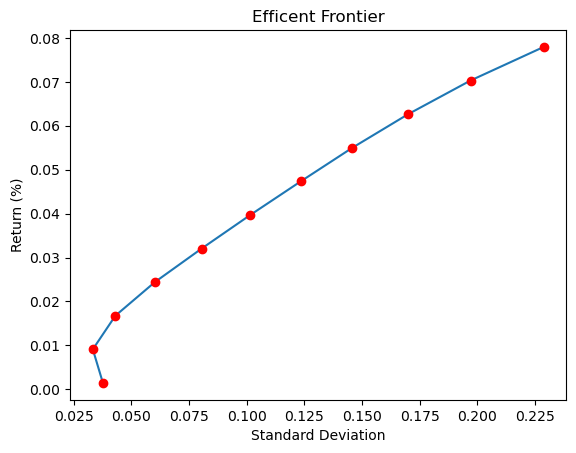

In [9]:
sorted_return = mean_returns.copy()
sorted_return.sort()
r_low = sorted_return[0]
r_high = sorted_return[26]

delta_r = round((3*r_high - r_low/3)/10,5)
new_range = np.arange(r_low/3, 3*r_high, delta_r)
portfolios =[]
p_ret = []
p_std =[]
for r in new_range:
    w, ret, std = minimum_variance_portfolio(mean_returns, r)
    portfolios.append((w, ret, std))
    p_ret.append(ret)
    # should be right
    p_std.append(np.sqrt(std))
# print(portfolios)
# print(p_std)

plt.plot(p_std,p_ret)
for i in range (0,11):
    plt.plot(p_std[i], p_ret[i], 'ro', label="Single Dot")

plt.title("Efficent Frontier")
plt.xlabel("Standard Deviation")
plt.ylabel("Return (%)")

Utility formula

$$U(r) = E(r) - \frac{1}{2} \cdot A \cdot \sigma_r^2$$

In this formula, U(r) repersents the utility of a portfolio, and E(r) repersents the expected return of the portfolio. A here is the risk adversion factor. We see that for positive A, we are decresing the utility value of our portfolio. This repersents that our investor dislikes risks, and will apply a penalty to the utility for taking risks.
Given that A = 10, we will use the previously generated Expected return and volitality to find the maximum W


Approach: For each of the data point on my efficient frontier, I will determine their Sharpe Ratio and choose the tangent portfolio based on the Sharpe ratio.

1. generate a smooth curve
2. plot the curve
3. Find the tangency portfolio
    a. look at each data point, aim to find the largest sharpe ratio
4. optimzie based on holdings
    b. big for loop?




The **Sharpe Ratio** is calculated as:

$$
S = \frac{R_p - R_f}{\sigma_p}
$$

Where:
- \( S \) = Sharpe Ratio
- \{ R_p \} = Expected portfolio return
- \( R_f \) = Risk-free rate
- \( \sigma_p \) = Standard deviation of portfolio returns

Text(0, 0.5, 'Return (%)')

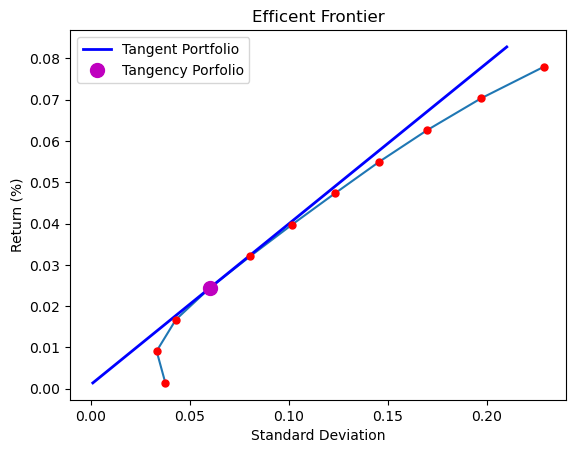

In [10]:
# compute the Sharpe ratio
# given R_f = 0.001
max_idx =-1
max_sharpe = 0
for i in range (0,11):
    cur_sharpe = (p_ret[i]-0.001)/p_std[i]
    if cur_sharpe > max_sharpe:
        max_sharpe = cur_sharpe
        max_idx = i


m = (p_ret[max_idx] - 0.001) / (p_std[max_idx])
b = 0.001

# Extend the line
x_extended = np.linspace(0.001 , p_std[max_idx] + 0.15, 2)  # Extend x range beyond the points
y_extended = m * x_extended + b  # Calculate y values based on the line equation


plt.plot(p_std,p_ret)
plt.plot(x_extended, y_extended, label="Tangent Portfolio", color="blue", linewidth=2)
for i in range (0,11):
    if i !=3:
        plt.plot(p_std[i], p_ret[i], 'ro',ms=5)
    else:
        plt.plot(p_std[i], p_ret[i], 'mo',ms = 10, label="Tangency Porfolio")


plt.legend()
plt.title("Efficent Frontier")
plt.xlabel("Standard Deviation")
plt.ylabel("Return (%)")

In [11]:
# selecting the optimal portfolio (assuming that we can't short)
sta_div = p_std[max_idx]
utility_value = -1
max_weight = -1
A = 10

y_star = (p_ret[max_idx]-0.001)/(10*sta_div**2)

print(f'We shuld have {round(y_star,3)}% of our portfolio being risk free asset')


We shuld have 0.647% of our portfolio being risk free asset
